In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from keras.models import Sequential
from keras.models import load_model
from keras.layers import *

In [16]:
training_data_df = pd.read_csv("sales_data_training_scaled.csv")

X = training_data_df.drop('total_earnings', axis=1).values
Y = training_data_df[['total_earnings']].values


#### How to decide input_dim = 9 as we have 9 col that we will be using as input 
- 'critic_rating', 'is_action', 'is_exclusive_to_us', 
- 'is_portable','is_role_playing', 'is_sequel', 
- 'is_sports', 'suitable_for_kids','total_earnings'

In [17]:
training_data_df.columns

Index(['critic_rating', 'is_action', 'is_exclusive_to_us', 'is_portable',
       'is_role_playing', 'is_sequel', 'is_sports', 'suitable_for_kids',
       'total_earnings', 'unit_price'],
      dtype='object')

### Define the model

In [18]:
model = Sequential()
model.add(Dense(50, input_dim=9, activation='relu',name="input_layer"))
model.add(Dense(100, activation='relu',name="layer1"))
model.add(Dense(50, activation='relu',name="layer2"))
model.add(Dense(1, activation='linear',name="output_layer"))
model.compile(loss="mean_squared_error", optimizer="adam")

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 50)                500       
_________________________________________________________________
layer1 (Dense)               (None, 100)               5100      
_________________________________________________________________
layer2 (Dense)               (None, 50)                5050      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 10,701
Trainable params: 10,701
Non-trainable params: 0
_________________________________________________________________


### Define logger

In [41]:
from keras.callbacks import TensorBoard

# Create a TensorBoard logger
logger = TensorBoard(
    log_dir='logs',
    write_graph=True,
    histogram_freq=0
)

### Train the model

In [42]:
model.fit(
    X,
    Y,
    epochs=50,
    shuffle=True,
    verbose=2,
    callbacks=[logger]
)

Epoch 1/50
 - 0s - loss: 3.5270e-05
Epoch 2/50
 - 0s - loss: 5.5898e-05
Epoch 3/50
 - 0s - loss: 5.2947e-05
Epoch 4/50
 - 0s - loss: 2.6944e-05
Epoch 5/50
 - 0s - loss: 2.3007e-05
Epoch 6/50
 - 0s - loss: 5.1371e-05
Epoch 7/50
 - 0s - loss: 2.7683e-05
Epoch 8/50
 - 0s - loss: 2.9654e-05
Epoch 9/50
 - 0s - loss: 4.6588e-05
Epoch 10/50
 - 0s - loss: 4.3489e-05
Epoch 11/50
 - 0s - loss: 3.0621e-05
Epoch 12/50
 - 0s - loss: 3.1538e-05
Epoch 13/50
 - 0s - loss: 3.9689e-05
Epoch 14/50
 - 0s - loss: 8.2640e-05
Epoch 15/50
 - 0s - loss: 6.9137e-05
Epoch 16/50
 - 0s - loss: 7.7021e-05
Epoch 17/50
 - 0s - loss: 5.5283e-05
Epoch 18/50
 - 0s - loss: 6.5709e-05
Epoch 19/50
 - 0s - loss: 6.6753e-05
Epoch 20/50
 - 0s - loss: 7.0416e-05
Epoch 21/50
 - 0s - loss: 4.6340e-05
Epoch 22/50
 - 0s - loss: 4.5916e-05
Epoch 23/50
 - 0s - loss: 3.1704e-05
Epoch 24/50
 - 0s - loss: 3.6304e-05
Epoch 25/50
 - 0s - loss: 2.9115e-05
Epoch 26/50
 - 0s - loss: 7.0147e-05
Epoch 27/50
 - 0s - loss: 4.0226e-05
Epoch 28/5

In [14]:
# Run below command on terminal to 

# tensorboard --logdir=logs
# above commad will read the logs files generated and display it on tensorboard

# opne browser and type localhost:6060 to access the board

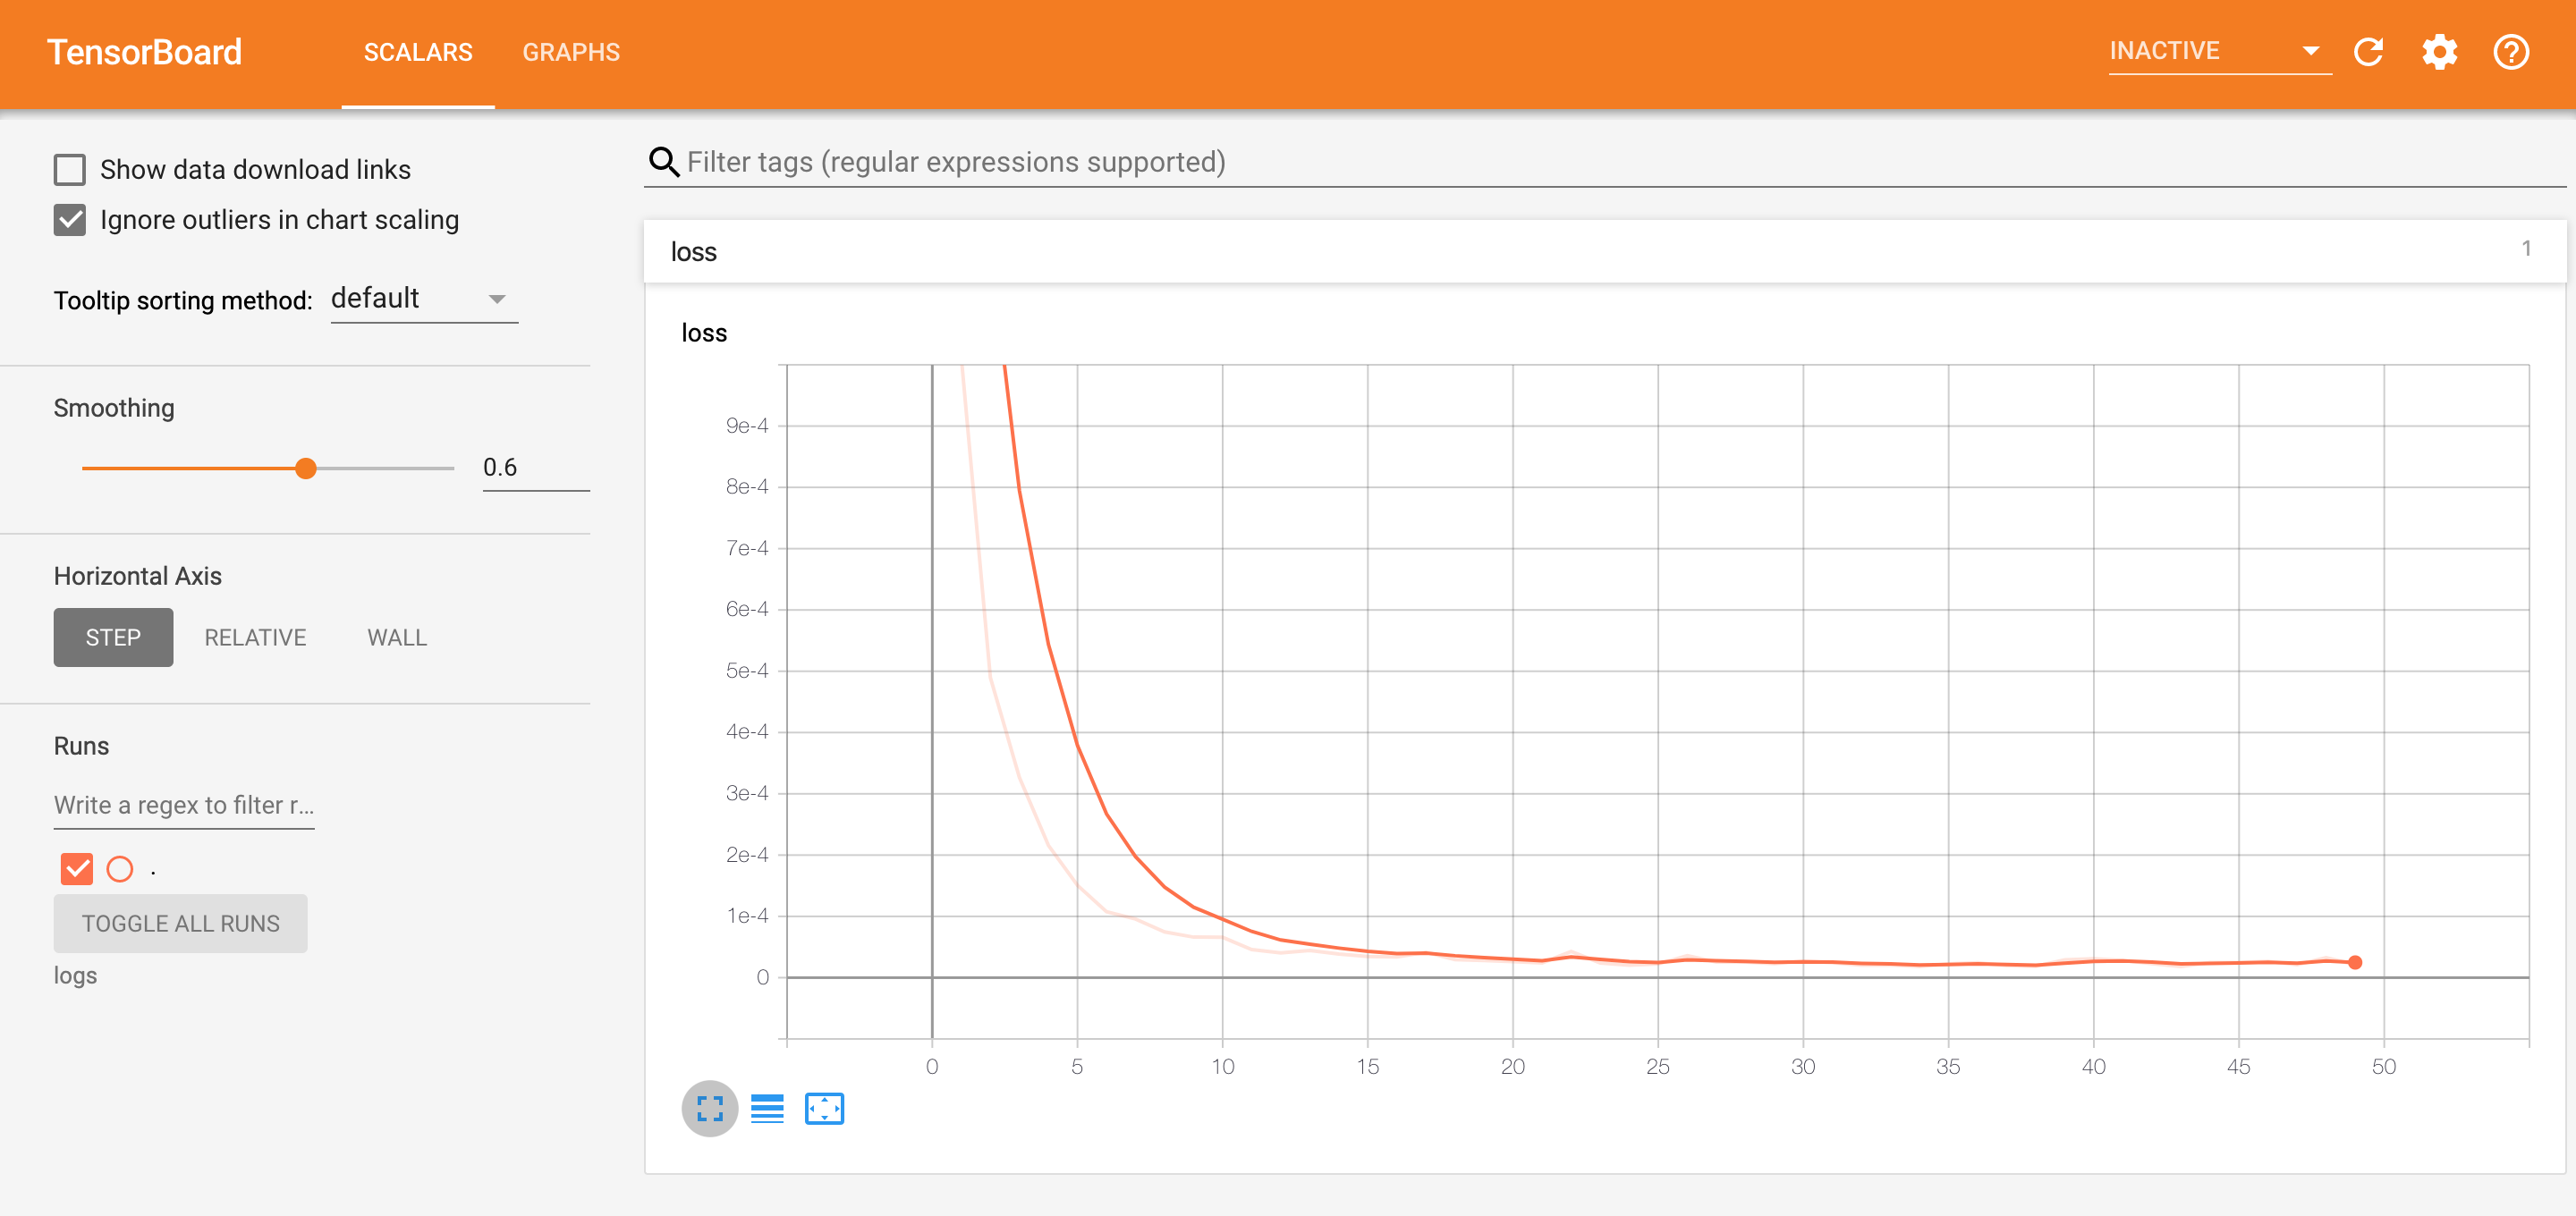

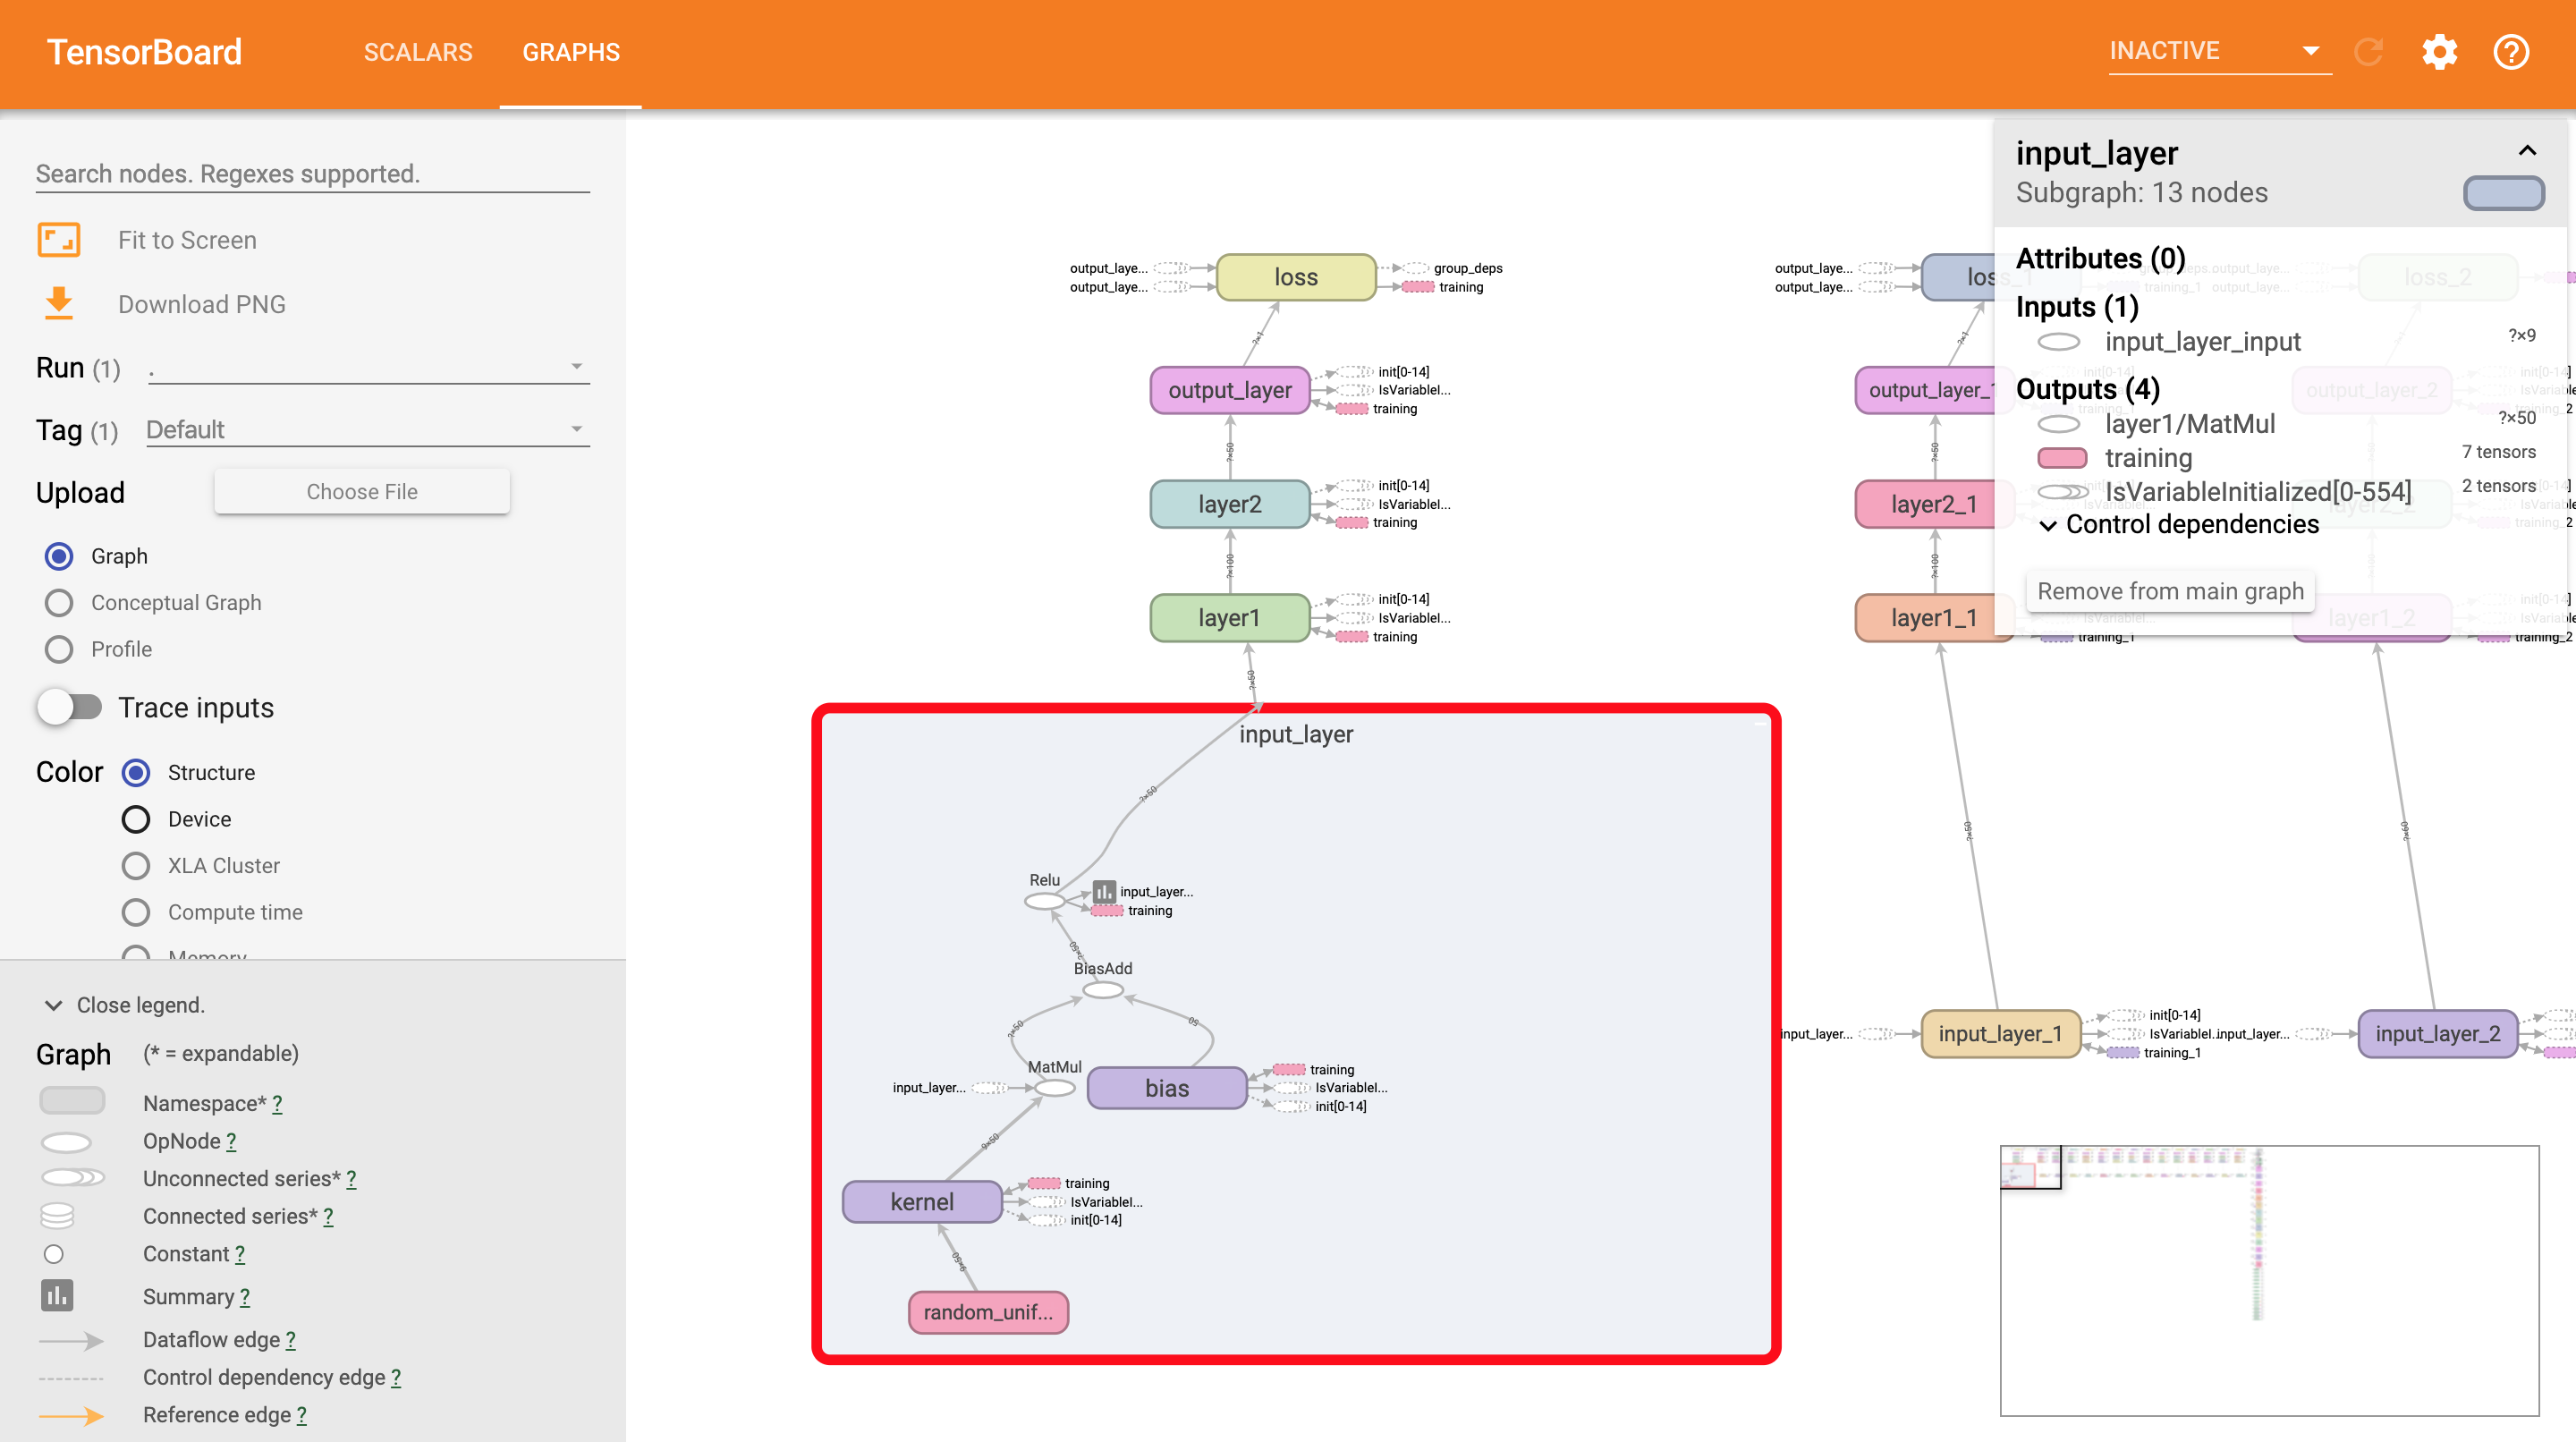

### Compare different models for in Tensorboard

In [37]:
def dense_60(X,Y):
    
    model = Sequential()
    model.add(Dense(60, input_dim=9, activation='relu',name="input_layer"))
    model.add(Dense(100, activation='relu',name="layer1"))
    model.add(Dense(50, activation='relu',name="layer2"))
    model.add(Dense(1, activation='linear',name="output_layer"))
    model.compile(loss="mean_squared_error", optimizer="adam")

    model.summary()
    
    logger = TensorBoard(log_dir='logs/{}'.format("dense_60"),write_graph=True,histogram_freq=0)
    
    model.fit(X,Y,epochs=50,shuffle=True,verbose=2,callbacks=[logger])

In [38]:
def dense_30(X,Y):
    
    model = Sequential()
    model.add(Dense(0, input_dim=9, activation='relu',name="input_layer"))
    model.add(Dense(100, activation='relu',name="layer1"))
    model.add(Dense(50, activation='relu',name="layer2"))
    model.add(Dense(1, activation='linear',name="output_layer"))
    model.compile(loss="mean_squared_error", optimizer="adam")

    model.summary()
    
    logger = TensorBoard(log_dir='logs/{}'.format("dense_20"),write_graph=True,histogram_freq=0)
    
    model.fit(X,Y,epochs=50,shuffle=True,verbose=2,callbacks=[logger])

In [39]:
def dense_5(X,Y):
    
    model = Sequential()
    model.add(Dense(5, input_dim=9, activation='relu',name="input_layer"))
    model.add(Dense(100, activation='relu',name="layer1"))
    model.add(Dense(50, activation='relu',name="layer2"))
    model.add(Dense(1, activation='linear',name="output_layer"))
    model.compile(loss="mean_squared_error", optimizer="adam")

    model.summary()
    
    logger = TensorBoard(log_dir='logs/{}'.format("dense_5"),write_graph=True,histogram_freq=0)

    model.fit(X,Y,epochs=50,shuffle=True,verbose=2,callbacks=[logger])

### Calling all the models

In [40]:
dense_60(X,Y)
dense_30(X,Y)
dense_5(X,Y)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 60)                600       
_________________________________________________________________
layer1 (Dense)               (None, 100)               6100      
_________________________________________________________________
layer2 (Dense)               (None, 50)                5050      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 11,801
Trainable params: 11,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
 - 0s - loss: 0.0179
Epoch 2/50
 - 0s - loss: 0.0026
Epoch 3/50
 - 0s - loss: 9.6181e-04
Epoch 4/50
 - 0s - loss: 5.0364e-04
Epoch 5/50
 - 0s - loss: 2.6706e-04
Epoch 6/50
 - 0s - loss: 1.8484e-04
Epoch 7/50
 - 0s - loss: 1.2722e-04
Epoch 8/50
 - 0s - loss: 1

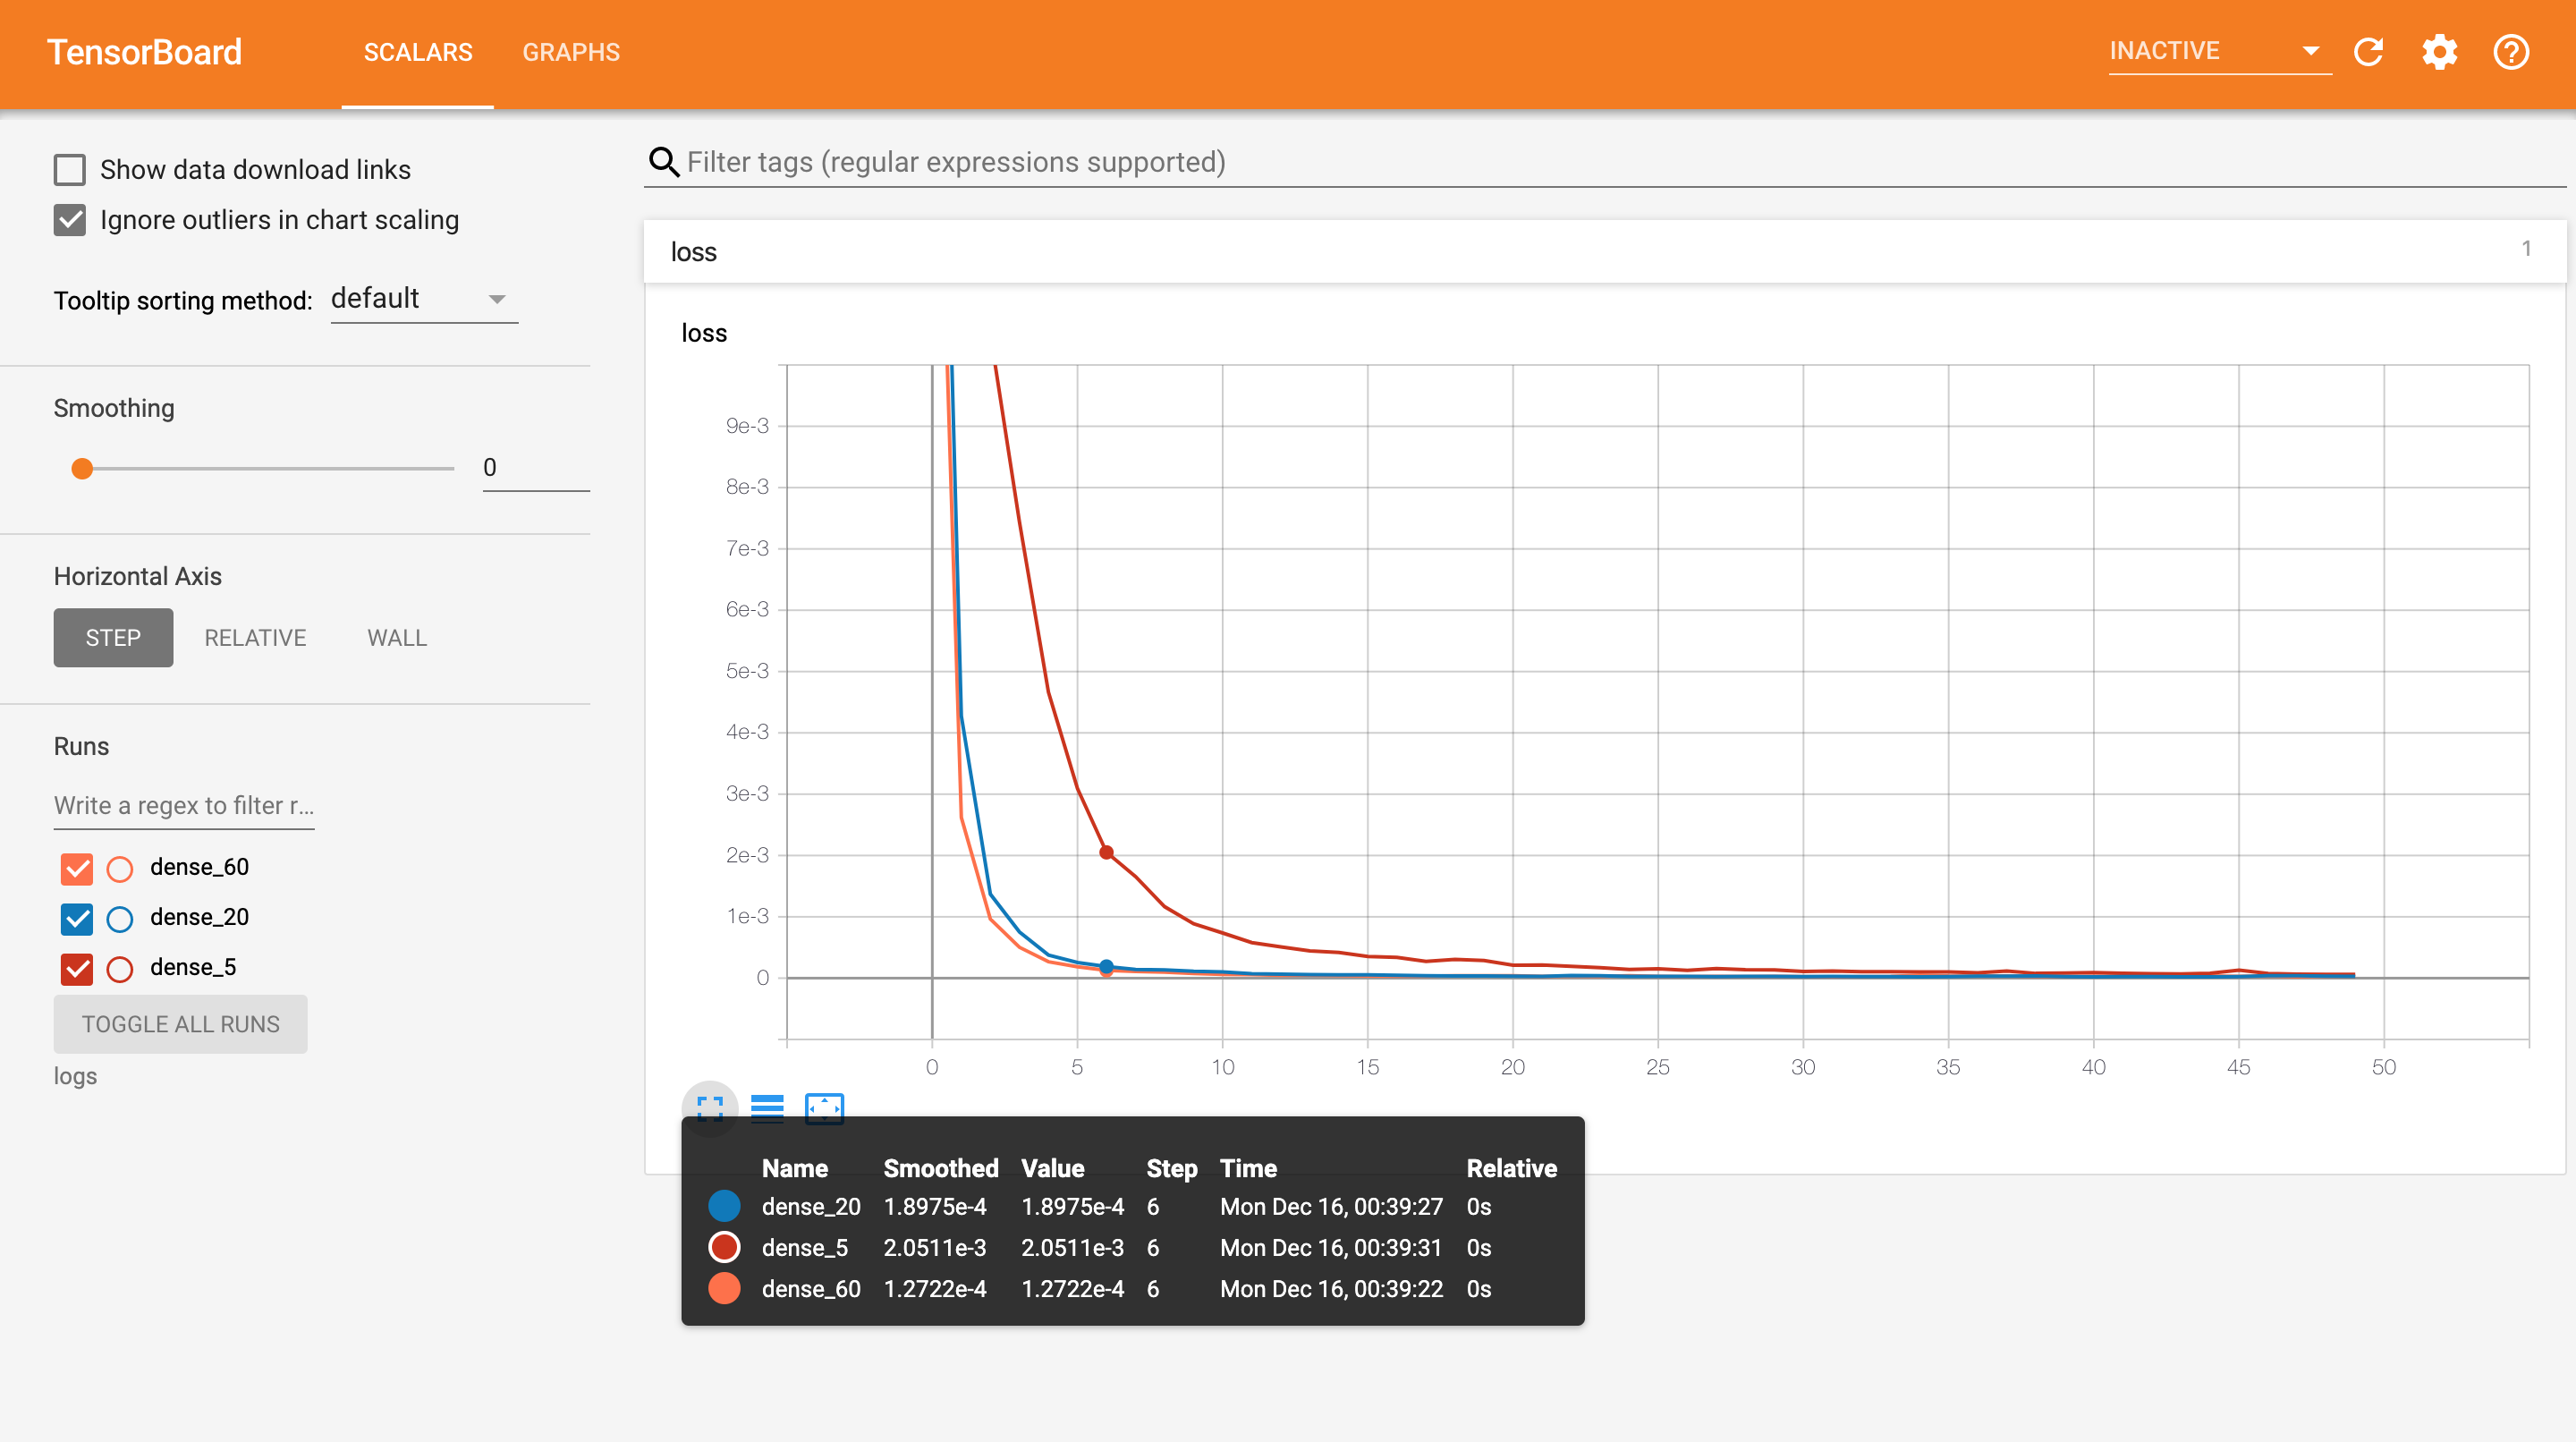

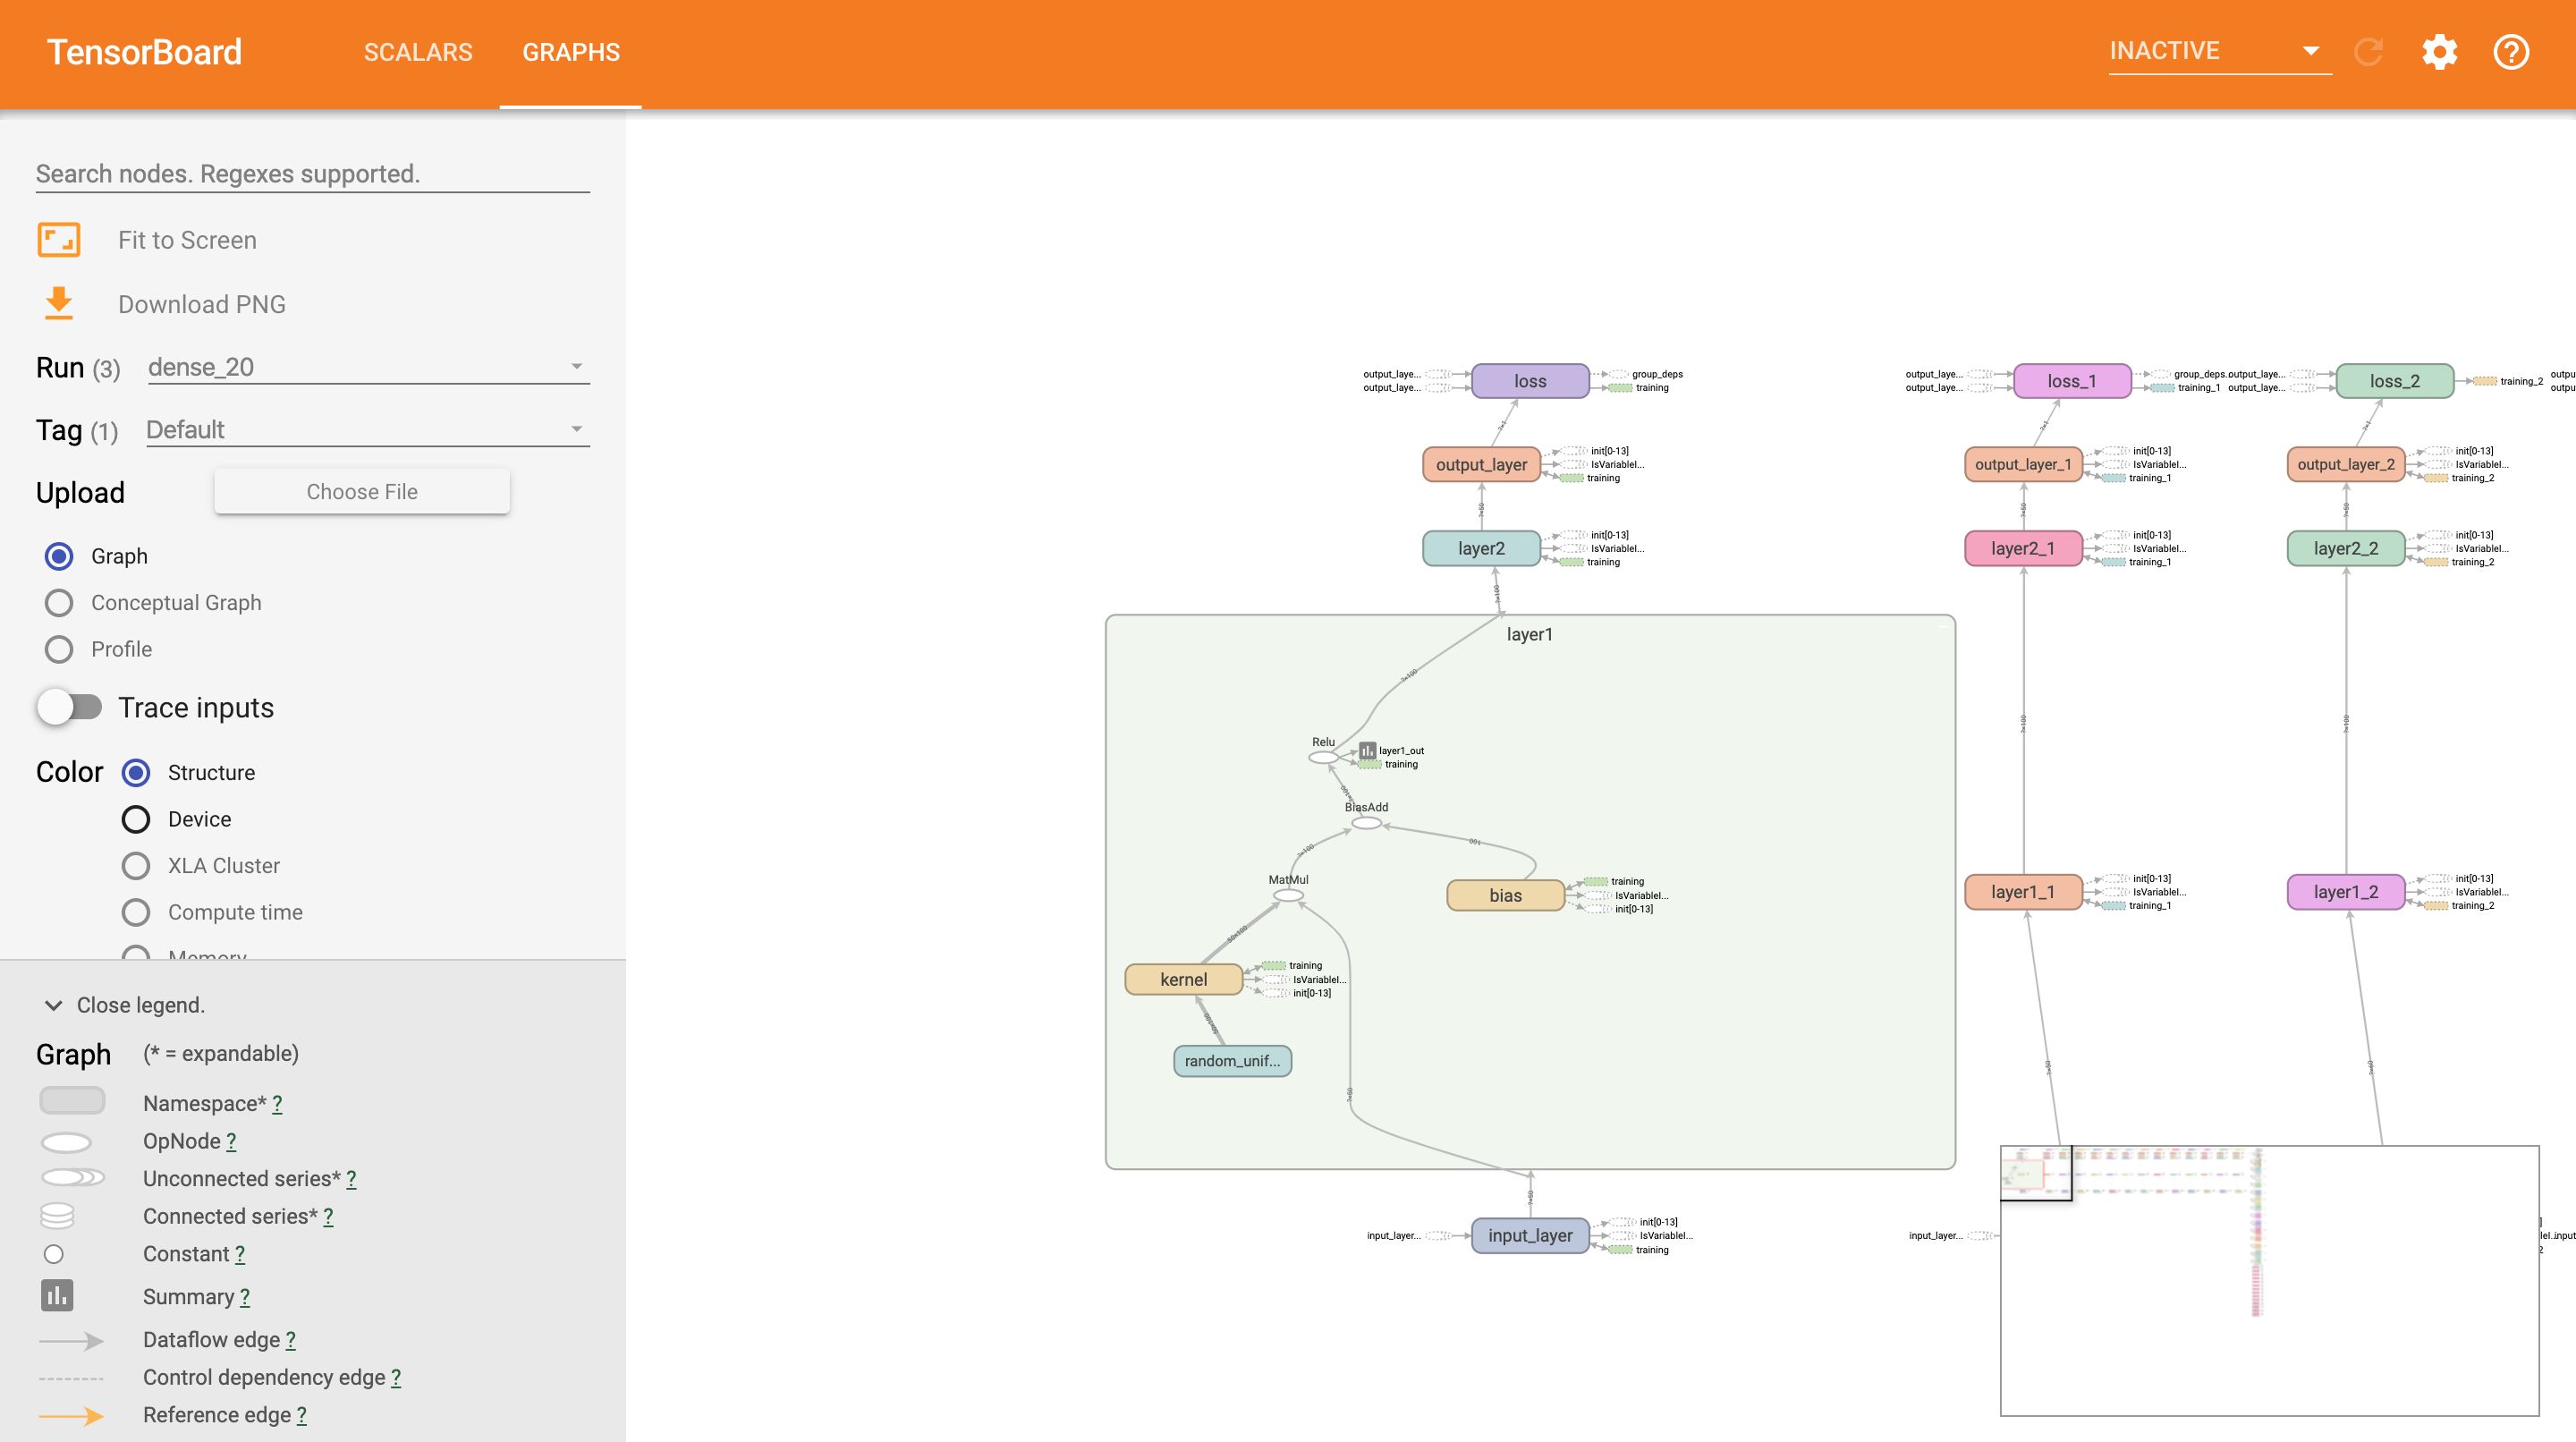